# Homework 4

## Submitted by: Tyler Lang

In [1]:
import pandas as pd
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import scipy.io as spio
import random as r
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Question 1: Optimization [20 points]

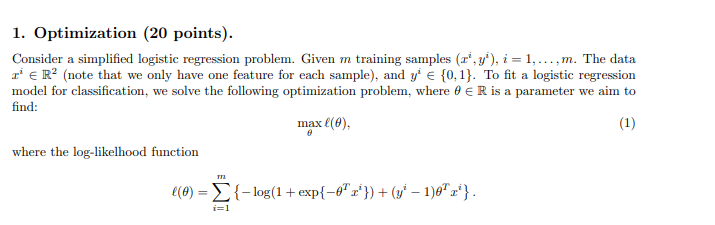

## Part 1: 

_show step by step the derivation for the gradient of the cost function, $l(\theta)$ in (1)_

To derive $l(\theta)$ as shown above, the derivation is quite simple. First, we can start by passing the derivation inside the sum: 

$\frac{d}{d\theta} l(\theta) = \Sigma^m_{i=1} \frac{d}{d\theta} [-log(1+e^{-\theta^T x^i}) + (y^i -1)\theta^T x^i]$

Then, we simply take the derivative of the left and right halves of the addition problem. 

Taking $\frac{d}{d\theta} -log(1+e^{-\theta^T x^i})$:

We can use the chain rule here. First, we take $u=1+e^{-\theta^T x^i}$ and then take the $\frac{d}{d\theta} -log(u)$, which is $\frac{1}{u} * du$, which, we can substitute our original expression back into u as 

$\frac{1}{1+e^{-\theta^T x^i}} \frac{d}{d\theta} [1+e^{-\theta^T x^i}]$

Then, taking $\frac{d}{d\theta} [1+e^{-\theta^T x^i}]$, due to the property of $\frac{d}{dx} e^{2x} = 2e^{2x}$, 

we get $\frac{d}{d\theta} [1+e^{-\theta^T x^i}]$ = $[0 + -x^i e^{-\theta^T x^i}]$

Thus, the full derivative of $\frac{d}{d\theta} -log(1+e^{-\theta^T x^i})$ = $-\frac{-x^i e^{-\theta^T x^i}}{1+e^{-\theta^T x^i}}$, of which the two negative signs cancel out. 

---------------

Now, for the right hand side of the addition term: We can take $\frac{d}{d\theta} (y^i -1)\theta^T x^i$, which is simply = $x^i(y^i-1)$

------------------------------------

Thus, the full derivative is  $\triangledown l(\theta)$ = $\Sigma^m_{i=1}[\frac{x^i e^{-\theta^T x^i}}{1+e^{-\theta^T x^i}} + x^i(y^i-1)]$

## Part 2: 

_Write a pseudo-code for performing gradient descent to find the optimizer, $\theta^*$. (This is what training procedure does)_

Because we cannot solve the optimization problem of $l(\theta)$ by setting the gradient = 0, we must use other techniques to minimize the function. Oftentimes, these techniques involve iterational techniques, or heuristics, which either converge to a optimum, or get very, very close to one. 

In this case, we can use gradient descent to find $\theta^*$. 

In gradient descent, the high-level idea of what it does is that we first take any initial guess, and from that point, we iteratively refine the guess by looking toward the direction of steepest descent - Aka, where a step "down the gradient" will lead to the steepest decline. At each iterative step, we must re-calculate the gradient, as the steepest direction changes based on where our new point is. The gradient is NOT constant at each point. 

Thus, keeping all this in mind, the psuedo-code for performing gradient descent would be the following:

--------------------------------

t_old = {randomly chosen point} #this is our initial point, which we will move from

acceptable_error = 10**-3

iter_max = {n}

iters = 0

step = {g} # all values in {} are constants.


t_new = t_old + step*gradient_l_theta   #calculating the new point based on taking the old point + the direction*step size.


while ||t_new - t_old|| > acceptable_error and iters < iter_max:

    t_old = t_new

    t_new = t_old + step*gradient_l_theta

    iters += 1
    
---------------------------------------

Either the algorithm will converge to a change in theta that has a distance from the original point that is less than a given acceptable_erorr value, or it will reach the max iterations. 

Now, before continuing with part 3, notice the following: 

**In this algorithm, we have to calculate the gradient with the entire dataset _every single iteration_**. This can become unneccesarily computationally expensive, and can be very impractical as our dataset reaches high values. Imagine 1 million data points being summed over for tens of iterations or more! Thus, a better algorithm would include a way to make a pretty good guess of the gradient at each point without having to sum over all points every time.


## Part 3: 

_Write pseudo-code for performing **stochastic gradient descent** to solve training of logistic regression problem (1). Explain difference between gradient descent and stochastic gradient descent for training logistic regression._

Due to the issues we see with batch gradient descent as seen in part 2, we can instead use **stochastic gradient descent**, which takes into consideration this limitation of batch GD, in which we have to evaluate every single data point over every single iteration, which can be impractical and expensive. 

In SGD, the basic idea is that, we perform GD, but at each iteration, we randomly sample a small subset of data points, and we calculate the gradient of $l(\theta)$ using just this sample, and continue with GD. 

As for the samples, we can split the original data into q-samples, and over each iteration, choose the next ith sample of all q-samples (the amount of sample batches we have depends on the size we want each sample). Then, we continue looping over all q-samples over and over again in order until the algorithm converges.

Now, one *important thing to note* is that, due to our sampling the data and calculating the gradient only on this sample, while trying to find the optimum for the entire dataset, we will naturally introduce some noise into our calculations, due to the sample not being a 100% perfect representation of the entire set. This becomes especially important as we get closer and closer to converging, in which the changes from point t_old to t_new become minimal (this happens because, as we move closer and closer to the optimum, our gradient gets smaller and smaller, converging toward 0, and thus we make smaller and smaller moves toward the final optimum). 

Due to the noise that this sample presents as mentioned, with a static step size, if our calculated gradient is slightly off from the true gradient at the given theta, then a bigger step size can cause the algorithm to overshoot, and it will flip flop from one side of the optimum to the other until it finally gets it right, costing a lot more iterations. However, if the step size is static and really small, it will simply move less every single iterations, leading to less progress per iteration, or in other words, even more iterations to finally converge. Thus, to fix this problem, we use a **decreasing step size**, such as $O(\frac{1}{t})$. Thus, as the algorithm is in its first stages, it has a larger step size, allowing it to make more progress initially, where there isn't much change of overshooting yet. Then, as it gets closer and closer to converging, the step-size gradually decreases to make sure the algorithm doesn't overshoot due to the noise of the gradient due to sampling, and a step-size that is too big.

_The psuedo-code thus is the following:_


------------------------------------------

_Creating the sample sets, assuming I want at least {n} data points per sample:_

_(if we have 456 datapoints, for example, and we want at least 100 points in each, I would create 4 sample sets)_


index_list = range(0,len(data)) #to get a list of indices to sample from

sample_sets = []

sample_iters = len(data)//{n}

for i in range(sample_iters): 

    if i != sample_iters - 1:
    
        sample = random sampling of [size = int(len(data)/i)] of [index_list]
        
        sample_sets.append(sample)
        
        index_list = index_list - [entries in sample]
    
    else:
    
        sample = index_list
        
        sample_sets.append(sample)


t_old = {randomly chosen point}

acceptable_error = 10**-3

iter_max = {n}

iters = 0

step = {g}

t_new = t_old + step*[gradient of l(t_old) evaluated with data[sample_sets[iters%sample_iters]]]

iters += 1

while ||t_new - t_old|| > acceptable_error and iters <= iter_max:

    t_old = t_new
    
    t_new = t_old + step*[gradient of l(t_old) evaluated with data[sample_sets[iters%sample_iters]]]
    
    iters += 1
    
    step = step*{a reduction term} #to reduce step-size for reasons discussed above.
------------------------------------

Notice two major changes with this psuedo-code to that in part 2: 

We have to code the sampling of the data, and given we will use this algorithm for data of any size, we have to use more general terms to decide how many samples will be made. I choose to make the samples based on having at least {n} data points per sample. I create a variable, sample_iters, which will be the value of the total amount of samples. This will be used then to divvy up the size of the samples of the data, by taking the length of the data divided by sample_iters. Then, due to some data sizes not being perfectly divisible by the sample quantity, I do this process for all but the last iteration (creating the last sample), in which the last sample gets all the rest of the data points. In the intermediate iterations, I have a list of indices, and it simply samples indices from this list, and then these elements get removed from the list. In the end, I have "sample_iters" samples stored in one list, which I will then iterate through using the iters value, which is initiated as 0. 

This is convenient, as iters can serve not only to count iterations, but also to take the remainder of division of the iteration number and the total sample sets I have. For example, if I have 4 total sets, the first time, I take the sample number corresponding to 0%4, or 0. Then 1%4 = 1... and so on. This is perfect, because over each iteration, it will cycle from 0 to {sample_iters}, in other words sampling over all samples over and over again when needed. 

Finally, note the step size being reduced each time by a specific algorithm of reduction. 

## Part 4: 

_**Show that training problem in basic logistic regression is concave**. Derive Hessian matrix of $l(\theta)$. Using this, show the training problem is concave. Explain why the problem can be solved efficiently, and gradient descent will achieve a unique global optimizer._

Remember that the Gradient of the likelihood function is 

 $\triangledown l(\theta)$ = $\Sigma^m_{i=1}[\frac{x^i e^{-\theta^T x^i}}{1+e^{-\theta^T x^i}} + x^i(y^i-1)]$

To get the Hessian, or double derivative, we only have to consider $\frac{x^i e^{-\theta^T x^i}}{1+e^{-\theta^T x^i}}$, as the term $x^i(y^i-1)$ does not have any $\theta$ variables

Thus, to solve this derivative, we just need to use the quotient rule, which states that 

$\frac{d}{dx} [\frac{f(x)}{g(x)}] = \frac{g(f)f'(x) - f(x)g'(x)}{g(x)^2}$

In this case, $f(x) = x^i e^{-\theta^T x^i}$  and $g(x) = 1+e^{-\theta^T x^i}$

Thus, solving for $f'(x) = -x_i^2 e^{-\theta^T x_i}$,

And, solving for $g'(x) = -x_i e^{-\theta^T x_i}$

Then, putting it all together, we have: 

$\frac{[1+e^{-\theta^T x^i}]*[-x_i^2 e^{-\theta^T x_i}] - [x^i e^{-\theta^T x^i}]*[-x_i e^{-\theta^T x_i}]}{[1+e^{-\theta^T x^i}]^2}$

To make it visually possible to follow, in the following line, $e^{-\theta^T x_i}$ will simply be represented as $e$, for clarity.

Then, carrying out multiplication, we have: 

$\frac{(1+e)(-x^2 e) - (xe)(-xe)}{(1+e)^2} = \frac{-x^2e - x^2e^2 + x^2e^2}{(1+e)^2} = \frac{-x^2e}{(1+e)^2}$ 


Thus, the final Hessian is 

$\triangledown^2 l(\theta) = - \frac{x_i^2 e^{-\theta^T x_i}}{(1+e^{-\theta^T x_i})^2}$

As can be seen, for any value of theta, this function will **Always have a negative outcome**. 

This is because all variables in the numerator and denominator lead to positives: the x-variable in the numerator is squared, the denominator is squared, and "e" raised to ANY power is never negative, as e is a positive value. Thus, due to the negative sign on the left, this Hessian will **ALWAYS BE POSITIVE DEFINITE.**

And as we know, a function with a positive definite Hessian will have a maximum point, or will be **concave**. And concave functions are easy to _maximize_, given their shape (concave shapes have a local maximum, at which all other points have a value LESS than that at the optimum. Image an upside-down cone, or a graph of $-x^2$, which exemplify concavity having a maximum optimum.)

Specifically, concave problems can be MAXIMIZED efficiently, because they only have one optimum, and the gradient at any given point points toward the optimum. Thus, with an algorithm like Stochastic Gradient Descent, it's impossible for the algorithm to "get lost" and not converge, as moving down the gradient will naturally lead to the one single optimum. And there are not other optimums, so the local optimum, the only one that SGD could lead to, is a global optimum.

# Question 2: Comparing Classifiers [40 points]

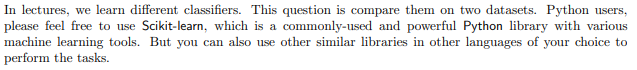

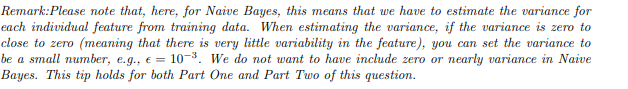

For all parts of Question 2, we will be comparing various supervised classification models. In part 1, we will be looking at binary classification, and in part 2, we will have multi-class classification. 

## Part 1: Divorce Classification 

#### Prediction with Naive Bayes, Logistic Regression, and KNN

This dataset has a binary outcome variable, which represents if the couple being interviewed divorced or not. Each column represents a specific question asked to the respondents, such as behaviors when they fight, or how they resolve conflicts, among many others. The idea with this dataset is that we can, with pretty good accuracy, use machine learning to classify response results as being a couple resulting in divorce or not, just based on the answers' values. 

While the findings present in the results of the analysis are very interesting in regards to signals for divorce, the point of this homework is not necessarily the motivation and final analysis of clustering itself, but rather to compare different clustering models to see which performs better, and why, based on the _Structure_ of the data. Thus, I will not be discussing what the results necessarily might mean about divorce and happy couples, but rather what it means about our models and the structure of the data as it is presented in the dataset.

For the following analyses, I will be using a Naive Bayes classifier, logistic regression, and K-Nearest Neighbors to classify the data, and compare accuracies. In each test, I will use 80% of the data for training, and the other 20% for testing. I will use the same training set for each model, as I do not want any results to be at all attributed to the randomness in my training data - but rather, given the data I have as training, how each model performs on the same test data.

In the following code cells, I load the data, split it into x and y variables, and then finally do a train/test split of the dependent variable and the independent variables.

In [2]:
marriage_raw = pd.read_csv(r'data/marriage.csv',header=None)
mx = marriage_raw.iloc[:,0:54].copy()
my = marriage_raw[54].copy()
mx_train, mx_test, my_train, my_test = train_test_split(mx, my, test_size=0.20, random_state=1993)

### Sub-part a:

_Report testing accuracy for each of the three classifiers. Comment on their performance. Which performs the best, and **why**?_

Now the fun begins! Having my training and testing sets, I can start with the first classifier - a Naive Bayes classifier. For Part A, I will be running the models, reporting testing accuracy (reported as % of points correctly classified), and will make comments on the way, as well as in the section labeled "Part A Summary".

For all models, the basic procedure using sklearn packages is the following: First a model has to be initialized/instantiated, either with given parameters to edit the future calculations of the model, or by simply using its default parameters. After instantiating a model, then we have to fit the model with training data, and finally use that same, now-fitted model, to make predictions on the x-test data. This can all be done with very, very few lines of code. The overall process in a usual data science pipeline would be much more complex, having to test for ideal parameters, using cross validation to test different models, and different variations of models, to see which performs best, to create a final model, but as the _goal and purpose of the assignment is to test the general workings of these models and the types of decision boundaries they form / how accurate they can be for the given data geometry, I will not be performing these tasks, as it would muddle the analysis and make it harder to compare the general TYPES of algorithms_. 

#### Naive Bayes

In [3]:
m_gnb = GaussianNB(var_smoothing=.01).fit(mx_train,my_train)
m_gnb_y_preds = m_gnb.predict(mx_test)
print(f"Naive Bayes is {round((accuracy_score(y_true = my_test, y_pred=m_gnb_y_preds)*100),2) } % accurate")

Naive Bayes is 94.12 % accurate


Naive Bayes is a Bayes-based model that uses probability and likelihood to make a well-performing _generalizable_ model, for classification. It assumes a distribution of the data based on the input/training data we have available, and given each class's prior distribution, it calculates the probability of a new point being of a given class vs the other, and assigns the class with the highest probability. This is all done using Bayes Rule, calculating the posterior using the likelihood and the prior as a way to calculate something unknown. Bayes models can be specified to use certain distributions to model against, such as the Gaussian, which is what I use (a Gaussian Naive Bayes). Furthermore, it is a Naive Bayes, as, for this simplified algorithm, we assume that all features are independent per label, which makes it a bit easier to calculate. As can be seen, this algorithm is a bit assumption-heavy, but it is really stellar for datasets with few data points, making a model that is quite good in a general sense, without strongly overfitting due to lack of data. Also, they are useful in that their decision boundary need not be linear! Which might help classify data boundaries with non-linear borders.

Already, by using Naive Bayes, we get a model that performed amazingly! Now, keep in mind that the test data is only 34 data points, but even then, this is a great accuracy for a model being used "right out of the package." Now, the question remains if this is due to Naive Bayes and how it creates the decision boundary (aka we can attribute it to a great model for this dataset), or if the data is simply very seperable across both classes. We will visualize that and answer that question more in part B. 

#### Logistic Regression

In [4]:
m_logr = LogisticRegression().fit(mx_train,my_train)
m_logr_y_preds = m_logr.predict(mx_test)
print(f"Logistic Regression is {round((accuracy_score(y_true = my_test, y_pred=m_logr_y_preds)*100),2) } % accurate")

Logistic Regression is 94.12 % accurate


Logistic Regression is a form of regression in which, like linear regression or other forms of regression, the model gives coefficients denoting the relationships between each independent variable with the dependent variable. As a classification tool, logistic regression is useful, as its output for the dependent variable can be interpreted as a probability, as its values always range from 0 to 1. Furhtermore, the independent variables can be either continuous or discrete. 

While logistic regression outputs a probability-like output, we can use that probability to work as a classifier, and calculate the probability of the dependent variable being a particular class. Then, if that probability is > a specific threshold (usually 50%), then we can round the output to get a particular class! 

One of the downsides to linear regression is that it too has certain assumptions that might not always hold true, but these assumptions are the same for linear regression as well (homoskedasticity, no multi-colinearity, etc). Also, it assumes a linearly seperable geometry of the data, as the decision boundary is linear. 


-------

As can be seen, the logistic regression model performed EXACTLY the same, in terms of accuracy, as the Naive Bayes model! That seems odd, but it might be evidence to the fact that, in fact, the data geometry is very seperable; in other words, that the points classified 1 vs 0 (divorce vs not) are not inter-spread, and are spread far enough apart that they can be easily separated from each other. Yet, the accuracy is not 100% (94% of 34 points means only 2 points are getting misclassified), so there must be some points that are hard to classify or are somewhat unlike those of their same class, who seem to be easy to classify and separate from the other classification.

In the next line of code, I will see which 2 points are not getting classified correctly, and see what their labels are.

In [5]:
print("What are the TRUE labels of the points being misclassified?")
for ind,i in enumerate(my_test):
    if m_logr_y_preds[ind] != i:
        print(f"point = {ind}, label = {i}")

What are the TRUE labels of the points being misclassified?
point = 1, label = 1.0
point = 14, label = 1.0


With 1 being the label for divorce, we can see that, there must be two respondents specifically who have responses to the survey that are more similar to those who did not divorce, causing the model to not be able to separate them. 

Because of Naive Bayes and logistic regression performing the same, it really is hard to compare the models at all, as they are more or less performing exactly the same in this case. I find this a very strange dataset to give us as part of the homework, given that our task / takeaway should be to see how the different models might perform differently, but in this case, I am assuming that the data is just really cleanly seperable, and cannot yet make ANY statements about model performance, until I see the graphs in part B.

#### KNN

Due to KNN possibly being influenced by the number of neighbors being used to compare per point, I will run a quick cross-validation test to see which number of neighors might be optimal, and pass that into the KNN object.

In [6]:
m_knn = KNeighborsClassifier()
pars = {'n_neighbors':[2,3,4,5,6,10]}
clf = GridSearchCV(m_knn,pars)
clf.fit(mx_train,my_train)
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'n_neighbors': [2, 3, 4, 5, 6, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

As can be seen, 5 (sometimes the output is 2!) neighbors leads to optimal results (even though, after running the same code below with any number of n_neighbors, I get the exact same accuracy anyway). 

In [7]:
m_knn = KNeighborsClassifier(n_neighbors=2).fit(mx_train,my_train)
m_knn_y_preds = m_knn.predict(mx_test)
print(f"K-Nearest Neighbors is {round((accuracy_score(y_true = my_test, y_pred=m_knn_y_preds)*100),2) } % accurate")

K-Nearest Neighbors is 94.12 % accurate


Finally, to finish part A, we have the KNN algorithm to try. Based on the exact same performance for Logistic regression and Naive Bayes, it wouldnt come as a surprise if this model performs similar or even the same.

KNN is a **NON** parametric algorithm, that basically looks at a new test data point, computes the distance between the point and its closest neighbors, and then compares the classes of the k-closest neighbors, and gives the new point the majority class of the k-neighbors. 

Due to this method of classification, which is less "mathematical", it leads to some of the most non-linear, noisy decision boundaries possible. The number of neighbors used to compare against too strongly affects the algorithm. Generally, as K increases, the model becomes more generalized, and with enough K, it can become over-generalized, while low k's can be very noisy, depending on the data. Thus, they are great for having flexibility, but can sometimes overfit due to their extreme flexibility. 

Literally yet again, we get the EXACT same accuracy using KNN, with the SAME exact points being misclassified... So again, there is little to parse from this just given the accuracy, in terms of comparing the models and their performance. 

In [8]:
print("What are the TRUE labels of the points being misclassified?")
for ind,i in enumerate(my_test):
    if m_knn_y_preds[ind] != i:
        print(f"point = {ind}, label = {i}")

What are the TRUE labels of the points being misclassified?
point = 1, label = 1.0
point = 14, label = 1.0


#### Part A Summary

In the end, there is very little summary to give for part A, as all models performed EXACTLY the same, in terms of the test data set I gave it, and the training data the model is trained on. With only this test data, we cannot say which model necessarily performed best, as they all performed phenominally and exactly the same, thus being more an ode to the nice seperability of the data than to the models themselves. In this case, it didn't matter if the boundary were linear (logistic regression), or non-linear -- all lead to the same result. Thus, I am not sure how to analyze "which model is the best," as they all turned out to be the best! Again, this probably has way more to say about the data then the models, in that the data per class must be cleanly seperable, even linearly. Now, we'll step into part B, where we will even graph these decision boundaries to see if this might be true, using 2 principle components.

### Sub-part b: 

_Now perform PCA into 2 dimensions. Build the same classifiers using the 2D PCA results. Plot the points and the decision boundary of each classifier._

_Comment on the difference of the decision boundary for each classifier. Clearly represent data with different labels using different colors._

The function below I found online on github using the link provided. It serves to plot the data and its true labels with a particular model's decision boundary.

In [9]:
#https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py#L1

def plot_decision_boundaries(X, y, fit_model, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = fit_model

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    scatter
    plt.legend(handles=scatter.legend_elements()[0],labels=[0,1])
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [10]:
scaler = StandardScaler().fit(mx_train)
mx_train_scaled = scaler.transform(mx_train)
mx_test_scaled = scaler.transform(mx_test)
mx_scaled = scaler.transform(mx)

In the code cell above, I first have to scale my data to prepare it for PCA (the PCA function performs centering, so I only have to worry about scaling). Thus, I use sklearn's Standard Scalar algorithm to achieve this, training on the train data and transforming both train and test using this fitted object. Then, I can pass these into the PCA algorithm, as done below.

In [11]:
pca = PCA(n_components=2).fit(mx_train_scaled)
mx_train_pca = pca.transform(mx_train_scaled)
mx_test_pca = pca.transform(mx_test_scaled)
my_train_pca = my_train.copy()
my_test_pca = my_test.copy()
mx_pca = pca.transform(mx_scaled)

In the above code, I fit a PCA object with our _training_ data, and then apply that fitted transformation to both the training and test data to be able to continue with the analysis of each model. Note that in the PCA object I am passing in scaled data, which is standard practice for PCA transformations. 

Now the data is ready to go! It is comprised of all original rows, now with only 2 features. I will run again each type of model, and then plot the features, their actual labels as colors, and the final decision boundary given by the model.

#### Naive Bayes

In [12]:
m_gnb_pca = GaussianNB(var_smoothing=.01).fit(mx_train_pca,my_train_pca)
m_gnb_y_preds_pca = m_gnb_pca.predict(mx_test_pca)
print(f"Naive Bayes is {round((accuracy_score(y_true = my_test_pca, y_pred=m_gnb_y_preds_pca)*100),2) } % accurate")

Naive Bayes is 94.12 % accurate


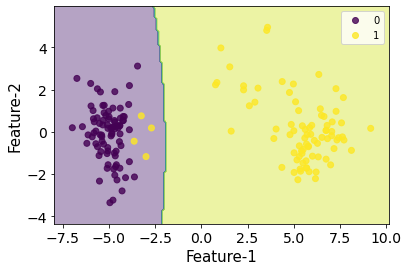

In [13]:
plot_decision_boundaries(mx_pca,my,m_gnb_pca)
plt.show()

Again, even with PCA, the results are exactly the same, and in the plotted graph, we can see why: the data is VERY, very seperable!! There is a huge border between the purple points (label = 0) and the yellow points (label = 1). Finally, we see 4 yellow points in the purple boundary, which represent the two real-1 points we always see misclassified in the TEST set, and it looks like 2 more points that get misclassified in the training set as well. 

As can be seen, the decision boundary is slightly non-linear, and has a curve to it, which makes sense, given the properties of Naive Bayes as discussed above. 

#### Logistic Regression

In [14]:
m_logr_pca = LogisticRegression().fit(mx_train_pca,my_train_pca)
m_logr_y_preds_pca = m_logr_pca.predict(mx_test_pca)

In [15]:
print(f"Logistic Regression is {round((accuracy_score(y_true = my_test_pca, y_pred=m_logr_y_preds_pca)*100),2) } % accurate")

Logistic Regression is 94.12 % accurate


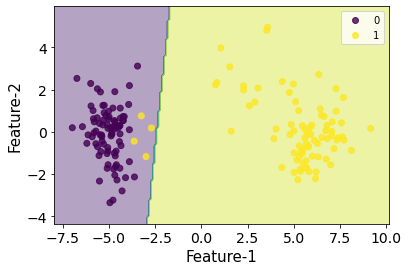

In [16]:
plot_decision_boundaries(mx_pca,my,m_logr_pca)
plt.show()

Once again, the accuracy is exactly the same, but this time, the slope is slightly positive, instead of negative. The decision boundary even more tightly hugs the purple mass of points, but still does not achieve classifying those 4 yellow points on the left.

#### KNN

In [17]:
m_knn_pca = KNeighborsClassifier(n_neighbors=2).fit(mx_train_pca,my_train_pca)
m_knn_y_preds_pca = m_knn_pca.predict(mx_test_pca)
print(f"K-Nearest Neighbors is {round((accuracy_score(y_true = my_test_pca, y_pred=m_knn_y_preds_pca)*100),2) } % accurate")

K-Nearest Neighbors is 94.12 % accurate


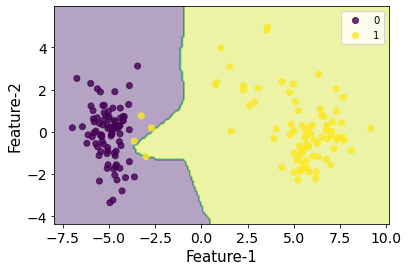

In [18]:
plot_decision_boundaries(mx_pca,my,m_knn_pca)
plt.show()

Low and behold, a 94.12% accuracy, which at this point, I believe is better than 100% accuracy, due to the 2D structure of the data (in my opinion, a good model would not necessarily hug that purple border extremely tightly just to correctly classify those 4 yellow points). 

As we know about KNN, it gives the noisiest decision boundary of the three models, which we see to be true here. Notice how, when I use n_neighbors = 2, that toward those 4 yellow points, the decision boundary is "pulled" left, classifying more points around the area closer to those 4 points as "divorced", which we would expect from KNN, and especially when our neighbor-quantity is only 2! Thus any point that has 2 yellow points as its closest point would be classified as "1". This could be an advantage of KNN, in situations where this flexibility is needed to be able to correctly classify data structures with more complex borders between the classes, but in this case, it seems to simply add more noise to the boundary, and could be potentially a sign of over-fitting, even though it still cannot achieve classifying those 4 points correctly. 

Now let's compare to k=5:

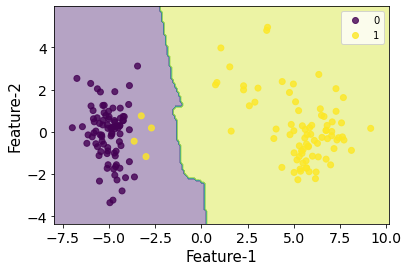

In [19]:
m_knn_pca2 = KNeighborsClassifier(n_neighbors=5).fit(mx_train_pca,my_train_pca)
m_knn_y_preds_pca2 = m_knn_pca2.predict(mx_test_pca)
plot_decision_boundaries(mx_pca,my,m_knn_pca2)
plt.show()

As can be seen, with k=5, the boundary in the middle is much less likely to be over-fitting. And in this instance, KNN actually proves to be a nice estimator, with a decision boundary more centered in the MIDDLE of the two clusters, rather than being so tightly hugged to the purple (0-label) points.

## Part 2: Handwritten Digits Classification

#### Multi-class classifications with KNN, Logistic Regression, SVM, Kernel SVM, and Neural Networks

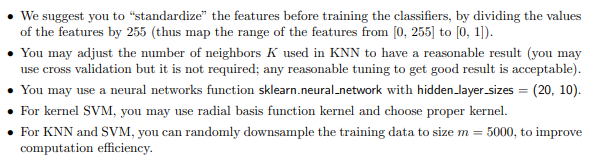

Now, for Part 2, we will be using 5 different models on data with a multivariate outcome, not binary! Again, we will be using KNN and logistic regression like before, as well as SVM, kernel SM, and even a neural net!

This part makes use of the famous MNIST data set of handwritten digits. Each row is a written digit, and each column representing a pixel in the image. 

### Sub-part a: 

_Report confusion matrix, precision, recall, and F-1 score for **Each** of the classifiers._

_For precision/recall/F-1, need to report for EACH DIGIT. Best represented in a table._

_Each classifier accounts for 10 points._

First, to start the problem, I read in the data, and then normalize the x matrices by dividing by 255, to get all values between 0 and 1, which will help some of the classifiers.

In [20]:
d_raw = spio.loadmat(r'data/mnist_10digits.mat')
dx_train = d_raw['xtrain']/255
dy_train = d_raw['ytrain']
dx_test = d_raw['xtest']/255
dy_test = d_raw['ytest']

**Downsampling dx_train**

Then, because the train dataset is huge, and thus will take a VERY long time for certain algorithms (KNN and SVM to be specific), we were instructed to take a sample of 5000 points from the training set, to improve computation efficiency. This is what I do below, in which I get a random list of 5000 indices, and then take those indices to splice a subset of both dx_train, and dy_train (the associated labels). 

In [21]:
r.seed(1993)
sample5k = r.sample(list(range(len(np.ravel(dy_train)))),5000)

dx_train_sample = dx_train[sample5k,:]
dy_train_sample = dy_train.T[sample5k,:].T

#### KNN

Now with our sample-data, we can perform KNN! 

Again, like above, I used cross validation to test different values of K to see which would be optimal for this algorithm, and found k=5 to be optimal. The code is commented-out, due to taking a very long time, but the results are printed in the cell below. If desired, the code blocks can be un-commented and ran. 

In [22]:
#d_knn = KNeighborsClassifier()
#pars = {'n_neighbors':[1,2,3,4,5,6,10]}
#clf = GridSearchCV(d_knn,pars)
#clf.fit(dx_train_sample,np.ravel(dy_train_sample))
#opt_pars_knn = clf.get_params()

#Find that optimal K = 5

Then, using this information, I create my k=5 KNN object, fit it with the sample data, and predict using the test data.

In [23]:
d_knn = KNeighborsClassifier(n_neighbors=5).fit(dx_train_sample,np.ravel(dy_train_sample))
d_knn_y_preds = d_knn.predict(dx_test)

In [24]:
print(f"K-Nearest Neighbors is {round((accuracy_score(y_true = np.ravel(dy_test), y_pred=d_knn_y_preds)*100),2) } % accurate")

K-Nearest Neighbors is 93.75 % accurate


As can be seen, KNN performed quite well! With a lot of data and multiple classifiers, this is quite impressive! If we had an hour or two, we could train it on all the training data and see if this accuracy would change at all. 

In [25]:
print("K-Nearest Neighbors: Confusion Matrix")
confusion_matrix(np.ravel(dy_test), d_knn_y_preds)

K-Nearest Neighbors: Confusion Matrix


array([[ 962,    1,    1,    0,    0,    3,    9,    2,    2,    0],
       [   0, 1132,    2,    1,    0,    0,    0,    0,    0,    0],
       [  23,   43,  923,    7,    0,    0,    6,   21,    9,    0],
       [   0,   12,    8,  949,    1,   14,    1,   12,   10,    3],
       [   2,   18,    0,    0,  913,    0,    8,    1,    2,   38],
       [  10,    5,    1,   27,    6,  821,   12,    2,    1,    7],
       [  10,    6,    0,    0,    4,    4,  934,    0,    0,    0],
       [   1,   34,    4,    0,    6,    0,    0,  964,    0,   19],
       [  14,    8,    4,   27,   12,   31,    8,    8,  846,   16],
       [   7,    8,    2,   11,   22,    1,    0,   22,    5,  931]],
      dtype=int64)

Looking at this confusion matrix, we can see that it definitely performed better on some digits overs, with some of the data points obviously being very ambiguous (as can be seen by the tails of misclassifications. For example, nearly any real digit being classified as a 0. This could be due to the model not quite capturing the specifics of the numbers, or to unique, or even shoddy handwriting in the images! 

In [26]:
print("K-Nearest Neighbors: Performance Statistics")
pd.DataFrame(precision_recall_fscore_support(np.ravel(dy_test), d_knn_y_preds,average=None)).rename(index={0:'Precision',1:'Recall',2:'F-Score',3:'Support'})[0:3]

K-Nearest Neighbors: Performance Statistics


,0,1,2,3,4,5,6,7,8,9
Precision,0.934888,0.893449,0.976720,0.928571,0.947095,0.939359,0.955010,0.934109,0.966857,0.918146
Recall,0.981633,0.997357,0.894380,0.939604,0.929735,0.920404,0.974948,0.937743,0.868583,0.922696
F-Score,0.957690,0.942548,0.933738,0.934055,0.938335,0.929785,0.964876,0.935922,0.915089,0.920415


By looking at the above performance measures, we can get a much better idea at how well the model did, and with which digits. Overall, it did very well with all digits. 

Just to review, precision is calculated as $\frac{TP}{TP+FP}$, or, in other words, how many of the points that were labeled a certain label actually belong to that label.

Then, Recall = $\frac{TP}{TP+FN}$, or, in other words, How many of the true points of a particular class were actually correctly labeled that class. 

Thus, for example, if we have a situation where recall is high, but precision is low, then we have a situation in which the algorithm did a good job at classifying all the points of a particular class in the right way, but ALSO classified a lot of other points with that same classification. Vice-versa for the other situation, in which precision would be high but recall low. 


As can be seen, the model's lowest measures were the precision for "1" and the recall for "2" and "8". Aka, the model misclassified some non-1s as 1s, and didn't quite capture all the 2s as well as it did for other numbers. The model had AMAZING recall for 0 and 1, meaning that it did a great job in correctly classifying the true 0s and 1s. 

The overall performance was best for 0, 1, and 6 (0 and 1 due to their high recall, but slightly suffered precision, and 6 due to its overall high values for each). -- This can be compared in the F-1 score, which is a combination score of the precision and recall.

#### Logistic Regression

Now, for logistic regression! 

In [52]:
d_logr = LogisticRegression(max_iter=500, tol = 10).fit(dx_train,np.ravel(dy_train))
d_logr_y_preds = d_logr.predict(dx_test)

In [53]:
print(f"Logistic Regression is {round((accuracy_score(y_true = np.ravel(dy_test), y_pred=d_logr_y_preds)*100),2) } % accurate")

Logistic Regression is 92.64 % accurate


As can be seen, logistic regression did a bit worse in terms of overall accuracy, but barely different overall. Still has a high accuracy. Note: This was the most problematic classifier, in terms of getting it to converge. While I tried so many methods to fix this, and get it to converge, it never did, making me guess that the data is not linearly seperable, or not fit for logistic regression. Only with an extremely high tolerance of 10 and a max_iterations of 500 was it able to finally converge. While this tolerance is perhaps drastic (relative to the data), it performed the same as the basic out-of-the-package model that was unable to converge.  

In [29]:
print("Logistic Regression: Confusion Matrix")
confusion_matrix(np.ravel(dy_test), d_logr_y_preds)

Logistic Regression: Confusion Matrix


array([[ 957,    0,    1,    4,    1,    9,    4,    3,    1,    0],
       [   0, 1112,    5,    1,    0,    1,    3,    1,   12,    0],
       [   6,    9,  931,   15,   10,    3,   12,    9,   33,    4],
       [   4,    1,   17,  921,    1,   25,    2,   10,   21,    8],
       [   1,    3,    7,    3,  922,    0,    5,    4,    7,   30],
       [   9,    2,    3,   34,    8,  779,   15,    7,   31,    4],
       [   8,    3,    9,    2,    6,   16,  911,    2,    1,    0],
       [   1,    7,   23,    7,    5,    1,    0,  949,    2,   33],
       [   9,   11,    6,   20,    8,   27,   13,    8,  861,   11],
       [   9,    8,    1,    9,   25,    7,    0,   19,    6,  925]],
      dtype=int64)

In [30]:
print("Logistic Regression: Performance Statistics")
pd.DataFrame(precision_recall_fscore_support(np.ravel(dy_test), d_logr_y_preds,average=None)).rename(index={0:'Precision',1:'Recall',2:'F-Score',3:'Support'})[0:3]

Logistic Regression: Performance Statistics


,0,1,2,3,4,5,6,7,8,9
Precision,0.953187,0.961938,0.928215,0.906496,0.935091,0.897465,0.944041,0.937747,0.883077,0.911330
Recall,0.976531,0.979736,0.902132,0.911881,0.938900,0.873318,0.950939,0.923152,0.883984,0.916749
F-Score,0.964718,0.970755,0.914988,0.909181,0.936992,0.885227,0.947478,0.930392,0.883530,0.914032


With logistic regression, again, the model performed best with 0, 1, and 6. This model did, however, have more extreme statistics, with some numbers having really high recall vs others with really low recall. Furthermore, we saw some instances in KNN in which a class with higher precision had lower recall (there was a balance between the two measures), but in this case, we see that the classes with higher precision also have higher recall, and those with lower precision also have lower recall, leading to a bigger variance in F-scores, with some even reaching below 90%. 

#### Linear SVM

SVM, a new algorithm to the homework, is a model that tries to maximize the margin between boundaries on the support vectors, as explained in lecture. SVM models can either have a linear, or a kernel, boundary, and we will test both! First, a linear boundary:

In [41]:
d_svm = LinearSVC(max_iter = 5000).fit(dx_train_sample,np.ravel(dy_train_sample))
d_svm_y_preds = d_svm.predict(dx_test)

In [42]:
print(f"SVM {round((accuracy_score(y_true = np.ravel(dy_test), y_pred=d_svm_y_preds)*100),2) } % accurate")

SVM 87.87 % accurate


Using the sample data for SVM for efficiency, I use a linear SVM model from sklearn. This model has had the lowest accuracy so far of the three, with only 88% accuracy. This could perhaps be due to the model over-generalizing the final boundary, as the model works to maximize the margin between the support vectors. It's hard to tell why the model did worse, but we can check exactly which numbers it performed worse on in the two cells below.

In [33]:
print("SVM: Confusion Matrix")
confusion_matrix(np.ravel(dy_test), d_svm_y_preds)

SVM: Confusion Matrix


array([[ 924,    0,    6,    7,    2,   14,   14,    6,    5,    2],
       [   0, 1103,    4,    7,    0,    3,    5,    1,   12,    0],
       [   3,   18,  866,   41,    9,    7,   18,   16,   48,    6],
       [   7,    2,   27,  868,    5,   38,    4,   10,   37,   12],
       [   2,    1,    9,    5,  881,    2,   15,   13,   12,   42],
       [  15,    2,    5,   63,   15,  709,   21,    7,   39,   16],
       [  12,    2,    8,    3,   16,   30,  879,    3,    5,    0],
       [   4,   15,   24,   10,   15,    3,    2,  898,    4,   53],
       [  11,   12,   10,   34,   18,   44,   13,   12,  801,   19],
       [   7,    4,    7,   13,   47,   11,    0,   37,   24,  859]],
      dtype=int64)

In [34]:
print("SVM: Performance Statistics")
pd.DataFrame(precision_recall_fscore_support(np.ravel(dy_test), d_svm_y_preds,average=None)).rename(index={0:'Precision',1:'Recall',2:'F-Score',3:'Support'})[0:3]

SVM: Performance Statistics


,0,1,2,3,4,5,6,7,8,9
Precision,0.938071,0.951682,0.896480,0.825880,0.874008,0.823461,0.905252,0.895314,0.811550,0.851338
Recall,0.942857,0.971806,0.839147,0.859406,0.897149,0.794843,0.917537,0.873541,0.822382,0.851338
F-Score,0.940458,0.961639,0.866867,0.842310,0.885427,0.808899,0.911353,0.884293,0.816930,0.851338


As can be seen, the model had a difficult time with the class's 5, 8, 3, and 9 (which seem to be the digits that the other 2 models had a harder time with as well), with the recall on class 5 being particularly low. This model simply seems less-able to pick up the subtle differences between the handwritten digits of each class, leading to lower performance. 

#### Kernel SVM

Now, for this part, we will be using a kernel to create a non-linear decision boundary with SVM! It will be interesting to see how this performs in comparison to linear SVM, as linear SVM relatively did so poorly. 

In [35]:
d_svm_kern = SVC(kernel = 'rbf',gamma='scale').fit(dx_train_sample,np.ravel(dy_train_sample))
d_svm_kern_y_preds = d_svm_kern.predict(dx_test)
print(f"Kernel SVM {round((accuracy_score(y_true = np.ravel(dy_test), y_pred=d_svm_kern_y_preds)*100),2) } % accurate")

Kernel SVM 95.56 % accurate


And interestingly enough, an SVM model with a radial basis function kernel has done the best so far of all the previous models! Thus, this might be due to its non-linear structure, which might be supported by logistic regression also having a slightly lower accuracy (which is also linear). However, perhaps this model outperformed KNN, as KNN has a tendency to sometimes overfit, whereas SVM's real benefit is to make it a generalizable classifier, which is careful to not overfit by maximizing the boundary between the support vectors when making the final decision boundary! 

Awesome job, SVM! 

In [36]:
print("Kernel SVM: Confusion Matrix")
confusion_matrix(np.ravel(dy_test), d_svm_kern_y_preds)

Kernel SVM: Confusion Matrix


array([[ 965,    0,    0,    0,    1,    5,    6,    1,    2,    0],
       [   0, 1121,    2,    2,    1,    1,    5,    1,    2,    0],
       [   6,    1,  977,    7,    8,    0,    9,   12,   12,    0],
       [   0,    0,   14,  965,    0,    8,    3,    9,    8,    3],
       [   1,    0,    3,    0,  945,    0,    8,    2,    2,   21],
       [   4,    1,    3,   17,    4,  842,   10,    1,    8,    2],
       [   6,    3,    1,    1,    6,    5,  934,    0,    2,    0],
       [   1,    9,   18,    2,    2,    0,    0,  965,    4,   27],
       [   4,    2,    5,   12,    7,   12,    8,    7,  913,    4],
       [   7,    4,    2,   11,   30,    4,    1,   13,    8,  929]],
      dtype=int64)

In [37]:
print("Kernel SVM: Performance Statistics")
pd.DataFrame(precision_recall_fscore_support(np.ravel(dy_test), d_svm_kern_y_preds,average=None)).rename(index={0:'Precision',1:'Recall',2:'F-Score',3:'Support'})[0:3]

Kernel SVM: Performance Statistics


,0,1,2,3,4,5,6,7,8,9
Precision,0.970825,0.982472,0.953171,0.948869,0.941235,0.960091,0.949187,0.954500,0.950052,0.942191
Recall,0.984694,0.987665,0.946705,0.955446,0.962322,0.943946,0.974948,0.938716,0.937372,0.920714
F-Score,0.977710,0.985062,0.949927,0.952146,0.951662,0.951950,0.961895,0.946542,0.943669,0.931328


As can be seen, the model performed fairly consistently across all classes, too! It, like all models, performed best on digits 0, 1, and 6, and performed "worse" on digits 8 and 9, but the range of F-scores is much tighter than other models! An F-score of 98.5%, like on digit 1, is just amazing! 

#### Neural Network

Finally, I will use a neural net, with 2 hidden layers of sizes 20 and 10 neurons, respectively. Neural networks, due to their potentially complicated-form decision boundaries, as shown in lecture, as well as the kind of feedback structure they create in which different neurons communicate different informations to different receptors, who in turn take the data and give their own output, the output of all these hidden layers finally being combined in a final neuron which gives final model output. They can be very complex and sometimes require a lot of data and layers to be able to do some of the magical things we were shown they can do in lecture. Nonetheless, we will try to see if Neural nets can outperform our other models with the 60,000 datapoints in training. 

In [38]:
d_nn = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=500, tol=.0005).fit(dx_train,np.ravel(dy_train))
d_nn_y_preds = d_nn.predict(dx_test)
print(f" MLP Neural Network is {round((accuracy_score(y_true = np.ravel(dy_test), y_pred=d_nn_y_preds)*100),2) } % accurate")

 MLP Neural Network is 95.26 % accurate


As can be seen, a neural net with 2 layers of sizes (20,10) was still the second-best performer (_slightly_ outperformed), but NOT the best performer, against what I initially expected, given how talked-up neural nets are! Goes to show that the most complex model out there isn't always the best, or might not be necessary! In this case, it seems the bigger margins given by a kernelized SVM model was just as useful as the specific and perhaps complex decision boundaries we can get with neural nets. 

In [39]:
print("Neural Network: Confusion Matrix")
confusion_matrix(np.ravel(dy_test), d_nn_y_preds)

Neural Network: Confusion Matrix


array([[ 958,    0,    1,    1,    1,    2,   10,    2,    4,    1],
       [   0, 1118,    2,    4,    0,    1,    4,    1,    5,    0],
       [   8,    5,  963,   15,    3,    2,   10,   15,   10,    1],
       [   2,    1,    7,  964,    3,   10,    0,    6,    8,    9],
       [   1,    1,    7,    1,  935,    2,    7,    9,    2,   17],
       [   7,    3,    1,   24,    6,  822,    8,    0,   14,    7],
       [  10,    4,   16,    0,    7,    7,  909,    0,    5,    0],
       [   2,    4,   15,    7,    3,    0,    0,  981,    4,   12],
       [   4,    3,    2,   11,    2,    7,    8,    8,  924,    5],
       [   2,    2,    0,    6,   21,    5,    0,   17,    4,  952]],
      dtype=int64)

In [40]:
print("Neural Network: Performance Statistics")
pd.DataFrame(precision_recall_fscore_support(np.ravel(dy_test), d_nn_y_preds,average=None)).rename(index={0:'Precision',1:'Recall',2:'F-Score',3:'Support'})[0:3]

Neural Network: Performance Statistics


,0,1,2,3,4,5,6,7,8,9
Precision,0.963783,0.979842,0.949704,0.933204,0.953109,0.958042,0.950837,0.944177,0.942857,0.948207
Recall,0.977551,0.985022,0.933140,0.954455,0.952138,0.921525,0.948852,0.954280,0.948665,0.943508
F-Score,0.970618,0.982425,0.941349,0.943710,0.952624,0.939429,0.949843,0.949202,0.945752,0.945852


Looking at the performance statistics of the model, The F-scores across nearly all digits for the neural net results are no better than those of the kernelized SVM model! While the percent difference in performance is slight, still, there were not any digits in which neural nets necessarily excelled, which is interesting. 

### Sub-part b:

_Comment on the performance of the classifier and give your explanation why some of them perform better than others._

NOTE: A lot of my analysis comparing the models is done ABOVE, in between the different lines of code! I compared as I went, so please read carefully above for the detailed explanations I gave, as well as some of my hypotheses why one might have done better than another. Here, I will give a summary of all finding and thoughts from above: 

In summary, it seems that the worst performers were the algorithms with linear decision boundaries, which might have something to say about the overall structure of the data. Furthermore, we see that kernel SVM was the best of all the models, perhaps due to the way in which SVM favors having a more generalizable model with its wider margin from the decision boundary to each border of each class's support vector. Even the neural net model could not beat it, meaning that perhaps the data was not so overly-complicated that it even required using a neural net to solve, since we did so well with the kernel-SVM model. Again, because all the models performed really well, I'd venture to say that this says a lot about the structure of the data itself, in that it must be somewhat fairly cleanly seperable, without any crazy or convoluted shapes in each class's data cloud. 

# Question 3: Naive Bayes for Spam Filtering [40 points]

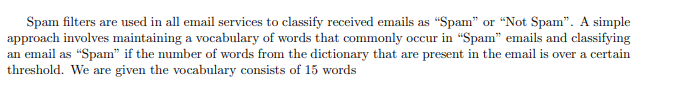

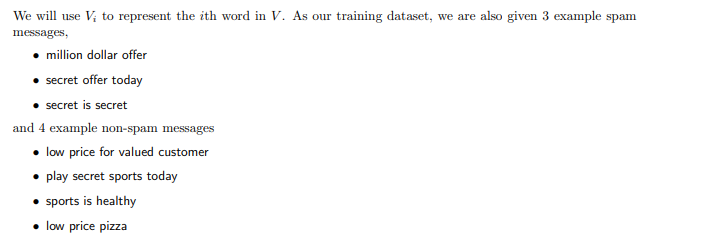

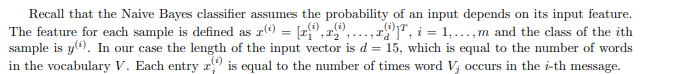

## Part 1:

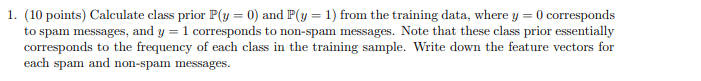

**Calculating the Priors**

To calculate $P(y=0)$ and $P(y=1)$, we simply take the frequency of each class.

$P(y=0)$ = $P($spam$)$ = $\frac{3}{3+4}$ = $\frac{3}{7} \approx 0.4285$

$P(y=1)$ = $P($not spam$)$ = $\frac{4}{3+4}$ = $\frac{4}{7} \approx 0.5714$

These are called the priors, and represent the overall probability of a sentence being spam or not spam, just based on the distribution of spam/not spam email frequencies, based on the training set. 

----------------

**Representing Data as Feature Vectors**

To represent each $x_i$ as a feature vector, we will represent it as a (1,15) array, with each column corresponding to the frequency that the i'th word in V is represented in $x_i$

$x_1 = [0,1,0,0,0,0,0,1,1,0,0,0,0,0,0]$  (spam)

$x_2 = [1,1,0,0,0,0,1,0,0,0,0,0,0,0,0]$  (spam)

$x_3 = [2,0,0,0,0,0,0,0,0,0,1,0,0,0,0]$  (spam)

$x_4 = [0,0,1,1,1,1,0,0,0,0,0,1,0,0,0]$ (not spam)

$x_5 = [1,0,0,0,0,0,1,0,0,1,0,0,1,0,0]$ (not spam)

$x_6 = [0,0,0,0,0,0,0,0,0,1,1,0,0,1,0]$ (not spam)

$x_7 = [0,0,1,1,0,0,0,0,0,0,0,0,0,0,1]$ (not spam)


## Part 2:

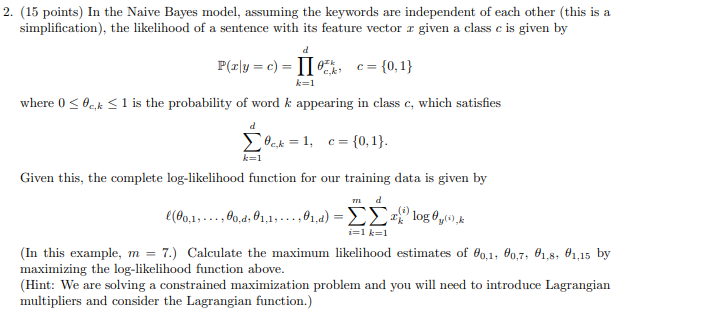

To be able to solve for each maximum likelihood estimate of each theta (the probability that word-k appears in class c), we can simply take the derivative of the log-likelihood function above, after turning it into a Lagrangian, due to the fact that it is a maximization problem with a constraint. In this case, the constraint is that all the probabilities of a given word within a given class all have to sum up to 1 (this is a hint, as well, for what the final result of the maximization will be -- will probably be something reminiscent of some counting!). Writing this constraint in math, this says that 

the maximization problem is _subject to_ $\Sigma_{k=1}^d \theta_{c,k} = 1$, where $c = {0,1}$

Thus, since we have a maximization problem, we can form a lagrangian, which puts the constraint into the problem itself to be maximized, with lambda acting as a punishment term. Thus, if the probabilities were to sum to something larger than 1, the entire lagrangian term would be negative, thus reducing the maximization problem. In practice, using a lagrangian naturally pushes the problem to the optimum anyway, without having to violate the constraint. Thus, in this specific example, it just serves as a fancy way to be able to solve our constrained problem with simple algebra and calculus.

Thus, we can turn 

$\Sigma_{i=1}^m \Sigma^d_{k=1} x_k^i log(\theta_{y^i , k})$ s.t. $\Sigma_{k=1}^d \theta_{c,k} = 1$, where $c = {0,1}$

into 

$L(\lambda,\theta) = \Sigma_{i=1}^m \Sigma^d_{k=1} x_k^i log(\theta_{y^i , k}) + \lambda(1-\Sigma^d_{k=1}\theta_{y^i , k})$.

Then, simplifying terms and expanding multiplications, we get: 

$\Sigma_{i=1}^m \Sigma^d_{k=1} x_k^i log(\theta_{y^i , k}) + \lambda - \lambda*\Sigma^d_{k=1}\theta_{y^i , k})$.

Now, we can take the derivative with respect to $\theta$. Note that, for the following derivative, to keep the latex clean, I will simply refer to the same summations as simply the summation of m or d, and the entire range of theta ($y^i, k$) will be, for now, represented simply as $\theta$. Similarly, all $x_k^i$ will be written as "x". Yet, still keep in mind their values, as it matters for the summation later on. 

Thus, taking $\frac{dL}{d\theta_j} = \Sigma^m x_j * \frac{1}{\theta_j} - \lambda = 0$, 

or 

$\Sigma^m \frac{x_j}{\theta_j} = \lambda$

Then, we can move theta to the other side: 

$\Sigma^m x_j = \lambda \theta_j$

Now, because we  KNOW, based on our previous constraint, that the sum of all thetas = 1, we can use a handy little trick in which we take the summation of both sides for all "d", which will force theta to 1, and isolate lambda. Let's do it! 

$\Sigma^d (\Sigma^m x_j) = \Sigma^d (\lambda \theta_j)$. Then, because $\lambda$ is a constant, it can be moved outside the sum, leaving $\Sigma^d \theta = 1$, leaving 

$\Sigma^d (\Sigma^m x_j) = \lambda$.

Now that we have solved for lambda, we can substitute this equation in for $\lambda$ in our previous equation $\Sigma^m x_j = \lambda \theta_j$, leaving us with

$\Sigma^m x_j = (\Sigma^d \Sigma^m x_j)* \theta_j$

Solving for theta: 

$\frac{\Sigma^m x_j}{\Sigma^d \Sigma^m x_j} = \theta_j$


Now, if we replace the indices of each variable, now with the sums, we get 

$\theta_{y,k} = \frac{\Sigma^m_{i=1} x_k^i}{\Sigma^d_{k=1} \Sigma^m_{i=1} x_k^i}$

And if we're really astute, we can find by logic that the numerator is simply the sum of all the instances of a given word in each sentence of a particular class (since we are summing ONLY *across sentences* for a partiular $x_k$), and the denominator is simply the sum of ALL instances of all words within a particular class (as we are summing all instances of a particular $x_k$, as in the numerator, but now also summing over all k-words.) 

Thus, we find that, after all that work, it turns into a very simple counting and summing problem! We just look for the proportion of words within a given class that are the  same as the word in question. As an example, if our word in question (our theta_word_k) is "healthy", and we're checking for non-spam messages, we see it appears once, out of all 15 words in the non-spam training set. 

Following this logic (using our solved MLE-$\theta_{y,k}$, we need to now solve for $\theta_{0,1}$, $\theta_{0,7}$, $\theta_{1,8}$, and $\theta_{1,15}$. 

### Solving $\theta_{0,1}$:

Since we are looking at the probability of "secret" to appear in spam messages, we can find that "secret" appears once in $x_2$ and twice in $x_3$. 

There are a total of 3+3+3 = 9 words in the spam set. 

Thus, $\theta_{0,1}$ = $\frac{3}{9}$ or $\frac{1}{3}$ 


### Solving $\theta_{0,7}$:

Again, spam messages, looking for the probability of the word "today": 

today appears once in $x_2$. Thus, 

$\theta_{0,7}$ = $\frac{1}{9}$



### Solving $\theta_{1,8}$:

Now, looking at non-spam messages, we are looking for the word "dollar". 

Dollar appears 0 times, out of all 15 words in the non-spam set. Thus, 

$\theta_{1,8}$ = 0! Because it appears 0 times.


### Solving $\theta_{1,15}$:

Finally, we are looking at non-spam again, for the word "pizza": 

Pizza appears one time in $x_7$. Thus, 

$\theta_{1,15}$ = $\frac{1}{15}$

## Part 3:

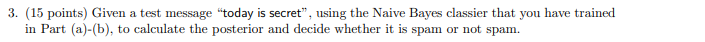

To be able to solve this problem, we need to find the following $\theta_{y,k}$: 

- $\theta_{0,"today"}$
- $\theta_{1,"today"}$
- $\theta_{0,"is"}$
- $\theta_{1,"is"}$
- $\theta_{0,"secret"}$
- $\theta_{1,"secret"}$

as well as the priors, p(y=0), p(y=1)! 


In other words, we need to find the probability that each of the three words is in our trained spam or non-spam messages, using the formula we found in part 2, and we need to know, in general, how likely a message is to be spam vs not spam. This is all due to our using Bayes rule, in which we can calculate a posterior using the following equation: 

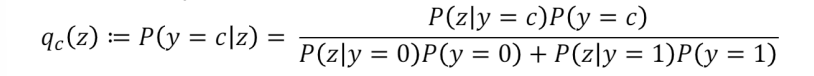

And because we have multiple words in our new test sentence, we have to take the product across all conditional probabilities: 

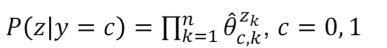

Solving this, we get first that 

- $\theta_{spam,"today"}$ = $\frac{1}{9}$
- $\theta_{not spam,"today"}$ = $\frac{1}{15}$
- $\theta_{spam,"is"}$ = $\frac{1}{9}$
- $\theta_{not spam,"is"}$ = $\frac{1}{15}$
- $\theta_{spam,"secret"}$ = $\frac{1}{3}$
- $\theta_{not spam,"secret"}$ = $\frac{1}{15}$
- $p(y=spam)$ = $\frac{3}{7}$
- $p(y= not spam)$ = $\frac{4}{7}$

Thus, for z = "today is secret", 

we solve for $P(z | y = spam)$ = $\prod \theta_{spam,k}$ = $\theta_{spam,"today"}$ * $\theta_{spam,"is"}$* $\theta_{spam,"secret"}$ = $\frac{1\cdot1\cdot1}{9\cdot9\cdot3}$ = $\frac{1}{243}$

And then we solve for $P(z | y = not spam)$ = $\prod \theta$ = $\theta_{not spam,"today"}$ * $\theta_{not spam,"is"}$ * $\theta_{not spam,"secret"}$ = $\frac{1\cdot1\cdot1}{15\cdot15\cdot15}$ = $\frac{1}{3375}$


Then, with our priors, we can solve for each $q_c(z)$:

-----------------------

### $q_{spam}(z)$:

= $\frac{\frac{1}{243}\cdot\frac{3}{7}}    {\frac{1}{243}\cdot\frac{3}{7} + \frac{1}{3375}\cdot\frac{4}{7}}$ = $\frac{\frac{3}{1701}}   {\frac{3}{1701} + \frac{4}{23625}}$ = 0.9124


### $q_{not spam}(z)$:

= $\frac{\frac{1}{3375}\cdot\frac{4}{7}}    {\frac{1}{3375}\cdot\frac{4}{7} + \frac{1}{243}\cdot\frac{3}{7}}$ = $\frac{\frac{4}{23625}}   {\frac{4}{23625} + \frac{3}{1701}}$ = 0.0875

Thus, comparing the two values, we can see that $q_{spam}(z)$ has a much higher probability, and we can conclude that, with our current algorithm, that the message is **SPAM!** 

# Question 4: Neural Networks [Bonus 5 points]

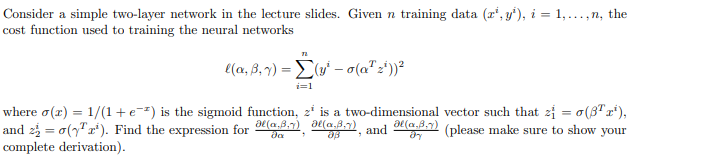

To be able to solve for this derivative, I can use substitution and derivative in parts to be able to solve it. 

The first step I can take would be solving for the derivative of $\sigma(x)$, which, once we know, we can plug in $\alpha^Tz^i$ for x in our final derivative.

Thus, I find that we can take the term $(1+e^{-x})$ in the denominator, and represent it as being $(1+e^{-x})^{-1}$, which we can then take the derivative more easily. As the derivative of $e^{-x}$ = $-e^{-x}$, and we duplicate the power "-1" as a scalar, and decrease the power by 1 to "-2", we get the following first-step of the derivative:

$\frac{d\sigma(x)}{dx}$ = $\frac{e^{-x}}{(1+e^{-x})^2}$

Next, using some fancy algebra, we can manipulate this into something we already know: $\sigma(x)$, to simplify the using of this expression: 

 $\frac{e^{-x}}{(1+e^{-x})^2}$ = $\frac{1}{1+e^{-x}} \frac{e^{-x}}{1+e^{-x}}$ = $\frac{1}{1+e^{-x}} (\frac{e^{-x}}{1+e^{-x}} + \frac{1}{1+e^{-x}} - \frac{1}{1+e^{-x}})$ 
 
=

$\frac{1}{1+e^{-x}} ( \frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}} )$

As one might observe, we have now explicitly reduced our derivative into a direct function of our original function, $\sigma(x)$! Furthermore, notice how we were able to reduce one fraction to one by having an equivalent numerator and denominator. Thus, we can now state that 

$\frac{d\sigma(x)}{dx}$ = $\sigma(x)(1-\sigma(x))$

Now, knowing the derivative of the base function $\sigma(x)$, we can now replace x with $\alpha^T z^i$.

Another important fact to notice is that alpha only appears once in this problem, and thus if the only expression containing alpha is $\alpha^T z^i$, then the derivative of alpha will simply be $z^i$. 

For simplicity's sake, let's represent $\alpha^T z^i$ as $u$, which I will use from here on out until substituting at the end. 

Thus, solving for alpha, we can run the following equations: 

$\frac{dl(\alpha, \beta, \gamma)}{d\alpha}$ = $\frac{d}{du^i} \Sigma^n_{i=1} (y^i - \sigma(u^i))^2 \frac{du^i}{d\alpha}$ 

= $\Sigma^n_{i=1} 2(y^i - \sigma(u^i))(-\sigma(u^i)(1-\sigma(u^i)))z^i$ 


-----------------------

Now, if we represent $\beta^T x^i$ (from $z_1^i$) as $v^i$, then $\frac{dv^i}{d\beta} = x^i$, then we can represent $z_1$ as $\sigma(v^i)$, and then, using the property we know from above, we can further state that 

$\frac{d\sigma(v)}{dv}$ = $\sigma(v)(1-\sigma(v))$ !


---------------------------


Now, taking the derivative with respect to $\beta$:

$\frac{dl(\alpha, \beta, \gamma)}{d\beta}$ = $\frac{dl(\alpha,\beta,\gamma)}{du}\frac{du}{dv}\frac{dv}{d\beta}$

= $\frac{d}{du} \Sigma^n_{i=1} (y^i - \sigma(u))^2 \frac{d}{dv} (\alpha^T z_1) \frac{dv}{d\beta}$ = $\frac{d}{du}\Sigma^n_{i=1} (y^i - \sigma(u))^2 \cdot \alpha \frac{dz_1}{dv} \frac{dv}{d\beta}$

= $\frac{d}{du}\Sigma^n_{i=1} (y^i - \sigma(u))^2 \cdot \alpha \frac{d\sigma(v)}{dv} \frac{dv}{d\beta}$

which finally, we can solve out using algebra to be 

$- \Sigma^n_{i=1} 2(y-\sigma(u))\cdot\sigma(u)\cdot(1-\sigma(u))\cdot\alpha\cdot\sigma(v)\cdot(1-\sigma(v)) \cdot x$


-----------------------------------------------

Finally, to solve for the derivative with respect to gamma, we can again use a substitution trick to easily solve the problem. Let's set 

w = $\gamma^T x^i$, which makes $\frac{dw}{d\gamma} = x$, 

$z_2 = \sigma(w)$, 

and $\frac{d\sigma(w)}{dw}$ = $\sigma(w)\cdot(1-\sigma(w))$

Then, we can solve in a similar fashion as before:


$\frac{dl(\alpha, \beta, \gamma)}{d\gamma}$ = $\frac{dl(\alpha, \beta, \gamma}{du}\frac{du}{dw}\frac{dw}{d\gamma}$ = $\frac{d}{du} \Sigma^n_{i=1} (y^i - \sigma(u^i))^2 \cdot \frac{d}{dw} (\alpha z_2) \frac{dw}{d\gamma}$ =  $\frac{d}{du} \Sigma^n_{i=1} (y^i - \sigma(u^i))^2 \cdot \alpha \cdot \frac{dz_2}{dw} \frac{dw}{d\gamma}$

= 

$\frac{d}{du} \Sigma^n_{i=1} (y^i - \sigma(u^i))^2 \cdot \alpha \cdot \frac{d\sigma(w)}{dw}
\frac{dw}{d\gamma}$

= 

$ - \Sigma^n_{i=1} 2\cdot(y^i - \sigma(u^i))\cdot\sigma(u^i)\cdot(1-\sigma(u^i))\cdot\alpha \cdot\sigma(w)\cdot(1-\sigma(w))\cdot x^i$

Thus, in summary, replacing the u's, v's, and w's with their original values, we get: 


$\frac{dl(\alpha, \beta, \gamma)}{d\alpha}$ = $\Sigma^n_{i=1} 2(y^i - \sigma(\alpha^T z^i))(-\sigma(\alpha^T z^i)(1-\sigma(\alpha^T z^i)))z^i$ 


$\frac{dl(\alpha, \beta, \gamma)}{d\beta}$ = $- \Sigma^n_{i=1} 2(y-\sigma(\alpha^T z^i))\cdot\sigma(\alpha^T z^i)\cdot(1-\sigma(\alpha^T z^i))\cdot\alpha\cdot\sigma(\beta^T x^i)\cdot(1-\sigma(\beta^T x^i)) \cdot x$

$\frac{dl(\alpha, \beta, \gamma)}{d\gamma}$ = $ - \Sigma^n_{i=1} 2\cdot(y^i - \sigma(\alpha^T z^i))\cdot\sigma(\alpha^T z^i)\cdot(1-\sigma(\alpha^T z^i))\cdot\alpha \cdot\sigma(\gamma^T x^i)\cdot(1-\sigma(\gamma^T x^i))\cdot x^i$